In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor, Button
from scipy import signal
import math
import os

directory  = 'data/Research_B/Data/'
AllHeartbeats = []
AllPeaks = []
count = 0

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)

    if os.path.isfile(f):
        
        highest_peak_values = []
        highest_peak_indices = []

        data = []
        RMSSD = []

        with open(f, 'r') as file:
            data_started = False
            for line in file:
                # Check if the line contains data
                if data_started:
                    values = line.strip().split()
                    data.append([int(val) for val in values])
                elif line.strip() == "# EndOfHeader":
                    data_started = True

            # Convert the data into a NumPy array
            data = np.array(data)

            heartbeat_data = data[:, 2]

            #Toggle inverse heartbeatdata
            if False:
                heartbeat_data = -heartbeat_data

            heightthreshold = 150  # Adjust this threshold as needed
            widthtreshold = 200


            #Butterworth filter
            sos = signal.butter(2, 3, 'highpass',fs = 1000, output = 'sos')
            filtered = signal.sosfilt(sos, heartbeat_data)

            # Create an array for the x-axis (time)
            time = np.arange(len(heartbeat_data))

            peaks, _ = signal.find_peaks(filtered, height=heightthreshold, distance= widthtreshold)
            AllHeartbeats.append(heartbeat_data)
            AllPeaks.append(peaks)
            print(count, end=' ')
            count += 1


        



0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 

In [90]:
#--------------------- Nieuwe berekening -------------------------
interval = 29000  # Meettijd per HRV waarde (ms)
waarde1 = 0
waarde2 = interval
All_HRV = []

def calculate_rmssd(heartbeat_data, peaks):
    HRVRMSSD = []
    waarde1 = 0
    waarde2 = interval
    
    for i in range(int((len(heartbeat_data) - interval) / 1000)):
        peaks_in_range_interval = [peak for peak in peaks if waarde1 <= peak <= waarde2]
        RMSSD = [math.pow(heartbeat_data[peaks[j+1]] - heartbeat_data[peaks[j]], 2) for j, peak in enumerate(peaks_in_range_interval)]
        HRVcount = sum(RMSSD)
        HRVRMSSD.append(HRVcount / (len(peaks_in_range_interval) - 1))
        waarde1 += 1000
        waarde2 += 1000
    
    waarde1 = 0
    waarde2 = interval
    return HRVRMSSD

# Voer de functie uit om HRVRMSSD te berekenen
count = 0
for peaks in AllPeaks:
    HRVRMSSD = calculate_rmssd((AllHeartbeats[count]), peaks)
    All_HRV.append(HRVRMSSD)
    print(count, end=' ')
    count += 1
print('')
print((All_HRV[0]))

'''
# Plot de HRV data met de RMSSD formule
# Maak een figuur en as-object
fig, ax = plt.subplots(figsize=(12, 6))

# Voeg de lijnplot toe aan de as
ax.plot(HRVRMSSD, label='HRV - RMSSD')

# Stel de titel en labels in
ax.set_xlabel('Time (Row Index)')
ax.set_ylabel('Amplitude')
ax.set_title('HRV data - Nieuw RMSSD')

# Voeg een raster en een legenda toe
ax.grid(True)
ax.legend()

ax.set_xlim(0, 1500)

ax.axvspan(180, 330, color="red", alpha=0.3)
ax.axvspan(330, 570, color="green", alpha=0.3)
ax.axvspan(570, 720, color="red", alpha=0.3)
ax.axvspan(720, 960, color="green", alpha=0.3)
ax.axvspan(960, 1110, color="red", alpha=0.3)
ax.axvspan(1110, 1350, color="green", alpha=0.3)
ax.legend()
'''


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 
[2709.657894736842, 2709.657894736842, 2709.657894736842, 2709.657894736842, 2701.135135135135, 2701.135135135135, 2709.657894736842, 2701.135135135135, 2701.135135135135, 2701.135135135135, 2751.1666666666665, 2751.1666666666665, 2751.1666666666665, 2751.1666666666665, 2719.942857142857, 2719.942857142857, 2751.1666666666665, 2719.942857142857, 2719.942857142857, 2751.1666666666665, 2751.1666666666665, 2719.942857142857, 2719.942857142857, 2719.942857142857, 2719.942857142857, 2719.942857142857, 2719.942857142857, 2719.942857142857, 2719.942857142857, 2719.942857142857, 2769.823529411765, 2769.823529411765, 2719.942857142857, 2719.942857142857, 2719.942857142857, 2769.823529411765, 2719.942857142857, 2719.942857142857, 2719.942857142857, 2751.1666666666665, 2751.1666666666665, 2719.942857142857, 2751.1666666666665, 2751.1666666666665, 2751.1666666666665, 2751.1666666666665, 2751.16666666

'\n# Plot de HRV data met de RMSSD formule\n# Maak een figuur en as-object\nfig, ax = plt.subplots(figsize=(12, 6))\n\n# Voeg de lijnplot toe aan de as\nax.plot(HRVRMSSD, label=\'HRV - RMSSD\')\n\n# Stel de titel en labels in\nax.set_xlabel(\'Time (Row Index)\')\nax.set_ylabel(\'Amplitude\')\nax.set_title(\'HRV data - Nieuw RMSSD\')\n\n# Voeg een raster en een legenda toe\nax.grid(True)\nax.legend()\n\nax.set_xlim(0, 1500)\n\nax.axvspan(180, 330, color="red", alpha=0.3)\nax.axvspan(330, 570, color="green", alpha=0.3)\nax.axvspan(570, 720, color="red", alpha=0.3)\nax.axvspan(720, 960, color="green", alpha=0.3)\nax.axvspan(960, 1110, color="red", alpha=0.3)\nax.axvspan(1110, 1350, color="green", alpha=0.3)\nax.legend()\n'

In [91]:
#Calculate HRV with RMSSD

interval = 30000 #Meettijd per HRV waarde (ms)
All_HRV2 = []
def calculate_rmssd2(heartbeat_data, peaks):

    HRVRMSSD2 = []
    waarde1 = 0
    waarde2 = interval
    HRVcount = 0
    q = 0
    RMSSD2 = []
    peaks_in_range_interval = 0
    peaks_in_range_interval2 = len([peak for peak in peaks if waarde1 <= peak <= waarde2])

    for i in range(int((len(heartbeat_data)-interval)/1000)):
        #Neem de kwadraten van de verschillen tussen de waardes
        for j in range(peaks_in_range_interval, peaks_in_range_interval2):
            RMSSD2.append(math.pow(heartbeat_data[peaks[peaks_in_range_interval+q+1]] - heartbeat_data[peaks[peaks_in_range_interval+q]], 2)) #heartbeat_data vervangen door pieken
            q = q+1

        #Tel verkregen waardes bij elkaar op
        HRVcount = sum(RMSSD2)

        #Deel deze waarde door het totaal aantal waardes -1
        HRVRMSSD2.append(HRVcount/(peaks_in_range_interval2-1))

        #Reset variabelen
        HRVcount = 0
        q = 0
        RMSSD2 = []
        
        #Verschuif het window met 1 seconden (1000 ms)
        waarde1 = waarde1 + 1000
        waarde2 = waarde2 + 1000
        peaks_in_range_interval = len([peak for peak in peaks if 0 <= peak <= waarde1])
        peaks_in_range_interval2 = len([peak for peak in peaks if 0 <= peak <= waarde2])
    return HRVRMSSD2

count = 0
for peaks in AllPeaks:
    HRVRMSSD2 = calculate_rmssd2((AllHeartbeats[count]), peaks)
    All_HRV2.append(HRVRMSSD2)
    print(count, end=' ')
    count += 1
print('')
print((All_HRV2[500]))
    
#plot de HRV data met de RMSSD formule
# Maak een figuur en as-object
'''
fig, ax = plt.subplots(figsize=(12, 6))

# Voeg de lijnplot toe aan de as
ax.plot(HRVRMSSD, label='HRV - RMSSD')

# Stel de titel en labels in
ax.set_xlabel('Time (Row Index)')
ax.set_ylabel('Amplitude')
ax.set_title('HRV data - RMSSD')

# Voeg een raster en een legenda toe
ax.grid(True)
ax.legend()

ax.set_xlim(0, 1500)

ax.axvspan(180, 330, color="red", alpha=0.3)
ax.axvspan(330, 570, color="green", alpha=0.3)
ax.axvspan(570, 720, color="red", alpha=0.3)
ax.axvspan(720, 960, color="green", alpha=0.3)
ax.axvspan(960, 1110, color="red", alpha=0.3)
ax.axvspan(1110, 1350, color="green", alpha=0.3)

plt.show()
'''

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 


IndexError: list index out of range

In [28]:
#Calculate HRV with SDNN

All_HRV3 = []
def calculate_sdnn(heartbeat_data, peaks):
    waarde1 = 0
    waarde2 = interval
    peaks_in_range_interval = 0
    peaks_in_range_interval2 = len([peak for peak in peaks if waarde1 <= peak <= waarde2])

    SDNNGem = 0
    SDNN = []
    HRVSDNN = []
    SDNNV = 0

    r=0

    for i in range(int((len(heartbeat_data)-interval)/1000)):
        #Tel meetwaardes bij elkaar op en deel deze door het aantal waardes om het gemiddelde te berekenen.
        for j in range(peaks_in_range_interval, peaks_in_range_interval2):
            SDNNGem += heartbeat_data[peaks[peaks_in_range_interval]]
        SDNNGem = SDNNGem/(peaks_in_range_interval2 - peaks_in_range_interval)

        #Bereken de afwijking per meetwaarde ten opzichte van het gemiddelde en neem hier het kwadraat van
        for g in range(peaks_in_range_interval, peaks_in_range_interval2):
            SDNN.append(math.pow(heartbeat_data[peaks[peaks_in_range_interval+r]] - SDNNGem, 2)) #heartbeat_data vervangen door pieken
            r = r+1

        #Tel de gekwadrateerde afwijkingen bij elkaar op en deel deze door het aantal meet meetwaardes, en neem hier vervolgens de wortel van
        SDNNV = sum(SDNN)
        HRVSDNN.append(math.sqrt(SDNNV/len(SDNN)))

        #Reset variabelen
        r = 0
        SDNNGem = 0
        SDNNV = 0
        SDNN = []

        #Verschuif het window met 1 seconden (1000 ms)
        waarde1 = waarde1 + 1000
        waarde2 = waarde2 + 1000
        peaks_in_range_interval = len([peak for peak in peaks if 0 <= peak <= waarde1])
        peaks_in_range_interval2 = len([peak for peak in peaks if 0 <= peak <= waarde2])
    return HRVSDNN

count = 0
for peaks in AllPeaks:
    HRVSDNN = calculate_sdnn((AllHeartbeats[count]), peaks)
    All_HRV3.append(HRVSDNN)
    print(count, end=' ')
    count += 1
print('')
print((All_HRV3[0]))

'''
# Maak een figuur en as-object
fig, ax = plt.subplots(figsize=(12, 6))

# Voeg de lijnplot toe aan de as
ax.plot(HRVSDNN, label='HRV - SDNN')

# Stel de titel en labels in
ax.set_xlabel('Time (Row Index)')
ax.set_ylabel('Amplitude')
ax.set_title('HRV data - SDNN')

# Voeg een raster en een legenda toe
ax.grid(True)
ax.legend()

ax.set_xlim(0, 1500)

ax.axvspan(180, 330, color="red", alpha=0.3)
ax.axvspan(330, 570, color="green", alpha=0.3)
ax.axvspan(570, 720, color="red", alpha=0.3)
ax.axvspan(720, 960, color="green", alpha=0.3)
ax.axvspan(960, 1110, color="red", alpha=0.3)
ax.axvspan(1110, 1350, color="green", alpha=0.3)

plt.show()
'''

NameError: name 'AllPeaks' is not defined

Epoch 1/500
3/3 [==============================] - 1s 115ms/step - loss: 1.2151 - val_loss: 0.9635
Epoch 2/500
3/3 [==============================] - 0s 9ms/step - loss: 1.2004 - val_loss: 0.9572
Epoch 3/500
3/3 [==============================] - 0s 9ms/step - loss: 1.1862 - val_loss: 0.9508
Epoch 4/500
3/3 [==============================] - 0s 9ms/step - loss: 1.1722 - val_loss: 0.9444
Epoch 5/500
3/3 [==============================] - 0s 10ms/step - loss: 1.1581 - val_loss: 0.9377
Epoch 6/500
3/3 [==============================] - 0s 9ms/step - loss: 1.1433 - val_loss: 0.9307
Epoch 7/500
3/3 [==============================] - 0s 10ms/step - loss: 1.1292 - val_loss: 0.9232
Epoch 8/500
3/3 [==============================] - 0s 10ms/step - loss: 1.1132 - val_loss: 0.9144
Epoch 9/500
3/3 [==============================] - 0s 9ms/step - loss: 1.0971 - val_loss: 0.9052
Epoch 10/500
3/3 [==============================] - 0s 9ms/step - loss: 1.0803 - val_loss: 0.8951
Epoch 11/500
3/3 [======

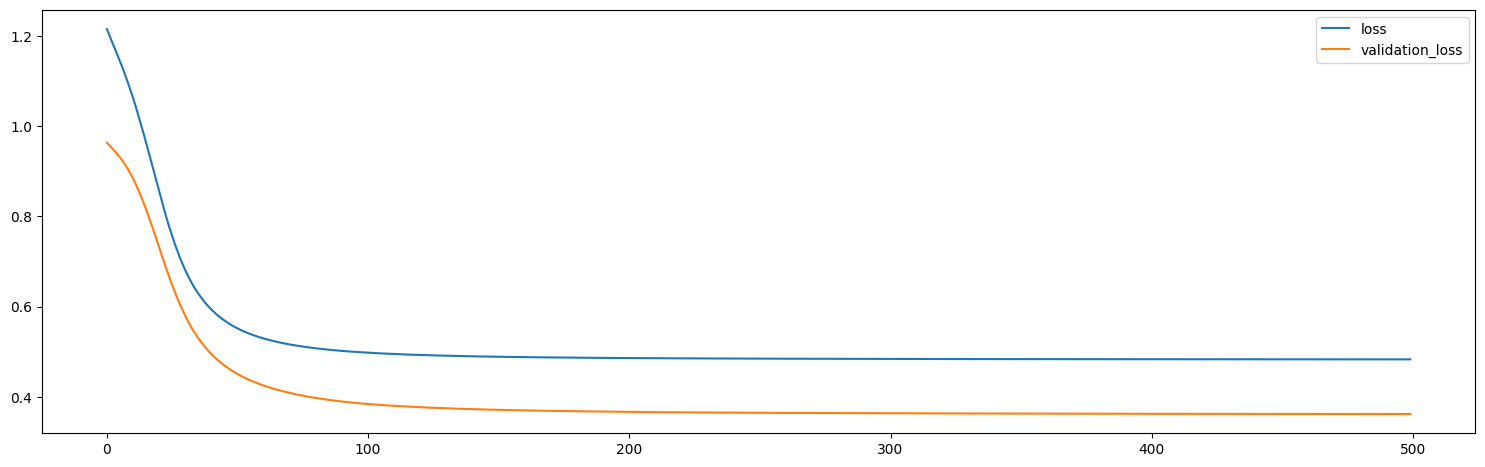

In [15]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score, f1_score, roc_curve
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, GRU
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from sklearn.metrics import r2_score

tf.get_logger().setLevel('ERROR')

# Load and process data
data = pd.read_csv('DataTest.txt', sep='\t')

columns = ['SEX', 'AGE', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y']
data = data[columns]

X = data[['BMI', 'Y', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6','AGE']]
Y = data['SEX']

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


# AI model
model = Sequential()
batch_size = 128
epochs = 500

model.add(LSTM(batch_size, input_shape=(1, X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer="adam", loss='mean_squared_error', metrics=[])

train_history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=1)
score = model.evaluate(X_test, Y_test, batch_size=batch_size)

# Print training results
print("Loss: {:0.4f}".format(score))

# Model voorspelt waarschijnlijkheden per klasse
y_pred_prob = model.predict(X_test)

#print('Accuracy: {:0.3}'.format(100 * accuracy_score(Y_test, 1 * (y_pred_prob > 0.5))))
mae = mean_absolute_error(Y_test, y_pred_prob)
print('Mean Absolute Error (MAE): {:0.3f}'.format(mae))
mse = mean_squared_error(Y_test, y_pred_prob)
print('Mean Squared Error (MSE): {:0.3f}'.format(mse))
r_squared = r2_score(Y_test, y_pred_prob)
print('R² (R-squared): {:0.3f}'.format(r_squared))

# Plot accuracy history
loss = train_history.history['loss']
validation_loss = train_history.history['val_loss']


fig = plt.gcf()
fig.set_size_inches(18.5, 5.5)
loss = train_history.history['loss']
validation_loss = train_history.history['val_loss']
plt.plot(loss)
plt.plot(validation_loss)
plt.legend(['loss', 'validation_loss'])
plt.show()


In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import tensorflow as tf
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

tf.get_logger().setLevel('ERROR')

# Load and process data
data = pd.read_csv('DataTest.txt', sep='\t')

columns = ['SEX', 'AGE', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y']
data = data[columns]

X = data[['BMI', 'Y', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'AGE']]
Y = data['SEX']

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

epochs = 150
batch_size = 128

def build_model(hp):
    model = Sequential()
    batch_size = 128

    model.add(LSTM(hp.Int('units', min_value=32, max_value=256, step=32), input_shape=(1, X_train.shape[2])))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop']), loss='mean_squared_error', metrics=[])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # You can adjust the number of trials
    directory='my_dir',
    project_name='lstm_hyperparameter_tuning')

tuner.search(X_train, Y_train, epochs=epochs, validation_split=0.1, verbose=1)

best_model = tuner.get_best_models(num_models=1)[0]

# Fit the best model to your data
best_model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=1)
score = best_model.evaluate(X_test, Y_test, batch_size=batch_size)

# Print training results
print("Loss: {:0.4f}".format(score))

# Model voorspelt waarschijnlijkheden per klasse
y_pred_prob = best_model.predict(X_test)

mae = mean_absolute_error(Y_test, y_pred_prob)
print('Mean Absolute Error (MAE): {:0.3f}'.format(mae))
mse = mean_squared_error(Y_test, y_pred_prob)
print('Mean Squared Error (MSE): {:0.3f}'.format(mse))
r_squared = r2_score(Y_test, y_pred_prob)
print('R² (R-squared): {:0.3f}'.format(r_squared))


Using TensorFlow backend


C:\Users\mickm\AppData\Local\Temp\ipykernel_27092\590099423.py:10: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


Reloading Tuner from my_dir\lstm_hyperparameter_tuning\tuner0.json
Epoch 1/150
3/3 [==============================] - 1s 133ms/step - loss: 0.4827 - val_loss: 0.3611
Epoch 2/150
3/3 [==============================] - 0s 10ms/step - loss: 0.4827 - val_loss: 0.3611
Epoch 3/150
3/3 [==============================] - 0s 10ms/step - loss: 0.4827 - val_loss: 0.3611
Epoch 4/150
3/3 [==============================] - 0s 9ms/step - loss: 0.4827 - val_loss: 0.3611
Epoch 5/150
3/3 [==============================] - 0s 9ms/step - loss: 0.4827 - val_loss: 0.3611
Epoch 6/150
3/3 [==============================] - 0s 10ms/step - loss: 0.4827 - val_loss: 0.3611
Epoch 7/150
3/3 [==============================] - 0s 9ms/step - loss: 0.4827 - val_loss: 0.3611
Epoch 8/150
3/3 [==============================] - 0s 10ms/step - loss: 0.4827 - val_loss: 0.3611
Epoch 9/150
3/3 [==============================] - 0s 10ms/step - loss: 0.4827 - val_loss: 0.3611
Epoch 10/150
3/3 [==============================] - 0